In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10
from matplotlib import style
style.use("ggplot")
import matplotlib.cm as cm

import pandas as pd
import time
from collections import namedtuple

In [2]:
#Load data and dropna
data = pd.DataFrame.from_csv("CrimesAll.csv")
print("Original Length: ", len(data))
data = data.dropna(axis=0)
print("Dropna Length: ", len(data))
data.head(1)

Original Length:  6342339
Dropna Length:  5655368


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
3787859,HL156321,02/01/2005 07:00:00 AM,029XX N NEWLAND AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2511,...,36.0,18.0,14,1129572.0,1918975.0,2005,04/15/2016 08:55:02 AM,41.933953,-87.799246,"(41.933953067, -87.799245983)"


Cut off outliers: 5646569


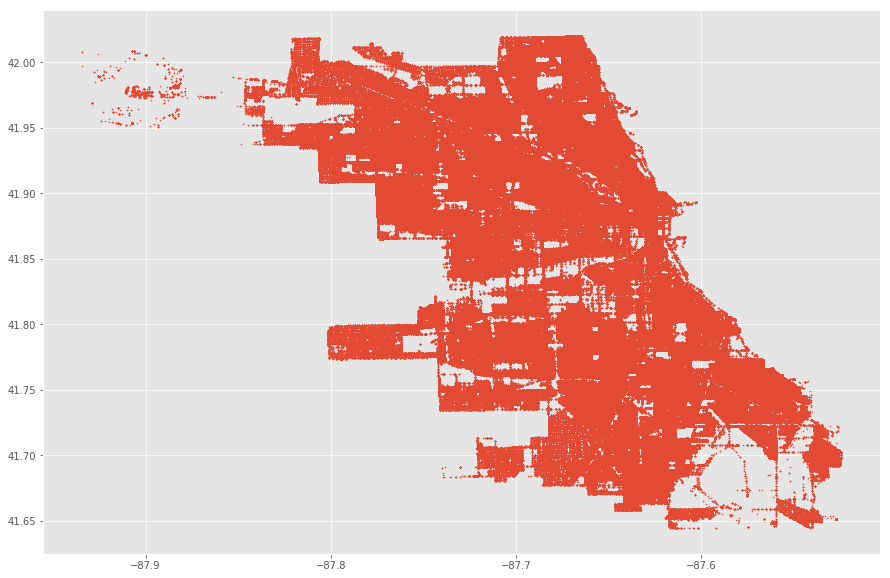

In [3]:
#Cut off outliers
data = data[data['Latitude'] > 41.644]
data = data[data['Latitude'] < 42.020]
data = data[data['Longitude'] > -87.940]
data = data[data['Longitude'] < -87.521]
print("Cut off outliers:", len(data))
plt.scatter(data['Longitude'], data['Latitude'], s = 1)
plt.show()

In [4]:
#Drop data before 2010
data = data[data['Year'] > 2009]
len(data)

2227095

In [5]:
data.columns

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [6]:
#Drop columns
data=data.drop(data.columns[[0, 2, 3, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20]], axis=1)
data.head(1)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year
ID,,,,,,,,
10504504,04/30/2016 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,6.0,2016


In [7]:
def GetHour(dfrow):
    formate = '%m/%d/%Y %I:%M:%S %p'
    return time.strptime(dfrow, formate).tm_hour

In [8]:
data['Hour']=list(map(GetHour, data['Date']))
data.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Hour
ID,,,,,,,,,
10504504,04/30/2016 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,6.0,2016,0
10504512,04/30/2016 12:00:00 AM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,29.0,2016,0
10504523,04/30/2016 01:05:00 AM,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,6.0,2016,1
10504536,04/30/2016 12:31:00 AM,ROBBERY,ARMED: HANDGUN,RESTAURANT,False,False,8.0,2016,0
10504538,04/30/2016 12:14:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,35.0,2016,0


In [ ]:
data.to_csv("Modified_Crimes.csv")